This notebook follows the same process as "Linear Regression 2019" but uses the total number of journeys beginning or ending at each docking station during 2020 as the target.

# Import libraries and data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
data = pd.read_csv("clean_combined_wards_2020_total_usage.csv")

In [74]:
data.head()

,latitude_x,longitude_x,description_code_x,oa11,laua,ward,lsoa11,msoa11,oac11,elevation,nearest_bus,nearest_tube,nearest_rail,total_usage,ward_name,old_code,newcode,population_-_2015,children_aged_0-15_-_2015,working-age_(16-64)_-_2015,older_people_aged_65+_-_2015,%_all_children_aged_0-15_-_2015,%_all_working-age_(16-64)_-_2015,%_all_older_people_aged_65+_-_2015,mean_age_-_2013,median_age_-_2013,area_-_square_kilometres,population_density_(persons_per_sq_km)_-_2013,%_bame_-_2011,%_not_born_in_uk_-_2011,%_english_is_first_language_of_no_one_in_household_-_2011,general_fertility_rate_-_2013,male_life_expectancy_-2009-13,female_life_expectancy_-2009-13_,%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14,"rate_of_all_ambulance_incidents_per_1,000_population_-_2014",rates_of_ambulance_call_outs_for_alcohol_related_illness_-_2014,number_killed_or_seriously_injured_on_the_roads_-_2014,in_employment_(16-64)_-_2011,employment_rate_(16-64)_-_2011,number_of_jobs_in_area_-_2013,employment_per_head_of_resident_wa_population_-_2013,rate_of_new_registrations_of_migrant_workers_-_2011/12,median_house_price_(£)_-_2014,number_of_properties_sold_-_2014,median_household_income_estimate_(2012/13),number_of_household_spaces_-_2011,%_detached_houses_-_2011,%_semi-detached_houses_-_2011,%_terraced_houses_-_2011,"%_flat,_maisonette_or_apartment_-_2011",%_households_owned_-_2011,%_households_social_rented_-_2011,%_households_private_rented_-_2011,%_dwellings_in_council_tax_bands_a_or_b_-_2015,"%_dwellings_in_council_tax_bands_c,_d_or_e_-_2015","%_dwellings_in_council_tax_bands_f,_g_or_h_-_2015",claimant_rate_of_key_out-of-work_benefits_(working_age_client_group)_(2014),claimant_rate_of_housing_benefit_(2015),claimant_rate_of_employment_support_allowance_-_2014,rate_of_jobseekers_allowance_(jsa)_claimants_-_2015,%_dependent_children_(0-18)_in_out-of-work_households_-_2014,%_of_households_with_no_adults_in_employment_with_dependent_children_-_2011,%_of_lone_parents_not_in_employment_-_2011,(id2010)_-_rank_of_average_score_(within_london)_-_2010,(id2010)_%_of_lsoas_in_worst_50%_nationally_-_2010,average_gcse_capped_point_scores_-_2014,unauthorised_absence_in_all_schools_(%)_-_2013,%_with_no_qualifications_-_2011,%_with_level_4_qualifications_and_above_-_2011,a-level_average_point_score_per_student_-_2013/14,a-level_average_point_score_per_entry;_2013/14,crime_rate_-_2014/15,violence_against_the_person_rate_-_2014/15,"deliberate_fires_per_1,000_population_-_2014",%_area_that_is_open_space_-_2014,cars_per_household_-_2011,average_public_transport_accessibility_score_-_2014,%_travel_by_bicycle_to_work_-_2011,turnout_at_mayoral_election_-_2012
0,51.454752,-0.195197,U,E00023152,E09000032,E05000624,E01004600,E02000940,3B1,6.285259,137.955060,1251.650607,917.897377,27343.0,Wandsworth - Southfields,00BJGP,E05000624,16750,3400,11950,1450,20.3,71.2,8.5,34.1,33,1.5,10933.3,24.4,34.8,9.0,76.6,80.3,85.9,6.6,16.5,86.4,0.4,2,9716,80.9,5700.0,0.5,28.5,515250.0,440,48160,7203,1.3,5.8,37.4,55.6,53.3,14.7,29.1,12.2,68.5,19.3,6.0,8.1,2.7,1.3,9.2,3.3,43.8,476,22.2,338.1,0.7,10.1,57.6,735.9,218.9,69.4,17.5,0.1,18.1,0.7,3.7,7.3,37.2
1,51.456820,-0.202802,R,E00022723,E09000032,E05000614,E01004511,E02000932,2D2,18.794371,109.129073,718.838716,1114.147350,9175.0,Wandsworth - Fairfield,00BJGD,E05000614,15350,2300,11950,1100,14.9,77.9,7.2,34.1,32,1.5,9966.7,22.1,32.5,7.1,55.0,79.5,81.7,7.5,21.2,106.4,1.0,5,9882,83.9,8300.0,0.7,27.2,500000.0,311,48590,6993,1.3,5.9,20.9,71.9,46.9,15.2,35.2,4.3,68.9,26.8,6.4,7.2,2.6,1.3,11.6,2.2,42.3,425,62.5,339.8,1.1,8.5,62.8,793.1,218.8,83.6,19.3,0.1,11.1,0.7,5.5,7.7,34.1
2,51.457059,-0.200806,R,E00022696,E09000032,E05000614,E01004511,E02000932,2D2,15.571350,21.880924,801.284683,938.622567,5938.0,Wandsworth - Fairfield,00BJGD,E05000614,15350,2300,11950,1100,14.9,77.9,7.2,34.1,32,1.5,9966.7,22.1,32.5,7.1,55.0,79.5,81.7,7.5,21.2,106.4,1.0,5,9882,83.9,8300.0,0.7,27.2,500000.0,311,48590

Drop Identifiers

In [75]:
data = data.drop(["latitude_x", "longitude_x"], axis=1)

*Check data types and data shape*

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 79 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   description_code_x                                                           791 non-null    object 
 1   oa11                                                                         791 non-null    object 
 2   laua                                                                         791 non-null    object 
 3   ward                                                                         791 non-null    object 
 4   lsoa11                                                                       791 non-null    object 
 5   msoa11                                                                       791 non-null    object 
 6   oac11                                     

*Describing the data*

In [77]:
data.describe(include = 'all')

,description_code_x,oa11,laua,ward,lsoa11,msoa11,oac11,elevation,nearest_bus,nearest_tube,nearest_rail,total_usage,ward_name,old_code,newcode,population_-_2015,children_aged_0-15_-_2015,working-age_(16-64)_-_2015,older_people_aged_65+_-_2015,%_all_children_aged_0-15_-_2015,%_all_working-age_(16-64)_-_2015,%_all_older_people_aged_65+_-_2015,mean_age_-_2013,median_age_-_2013,area_-_square_kilometres,population_density_(persons_per_sq_km)_-_2013,%_bame_-_2011,%_not_born_in_uk_-_2011,%_english_is_first_language_of_no_one_in_household_-_2011,general_fertility_rate_-_2013,male_life_expectancy_-2009-13,female_life_expectancy_-2009-13_,%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14,"rate_of_all_ambulance_incidents_per_1,000_population_-_2014",rates_of_ambulance_call_outs_for_alcohol_related_illness_-_2014,number_killed_or_seriously_injured_on_the_roads_-_2014,in_employment_(16-64)_-_2011,employment_rate_(16-64)_-_2011,number_of_jobs_in_area_-_2013,employment_per_head_of_resident_wa_population_-_2013,rate_of_new_registrations_of_migrant_workers_-_2011/12,median_house_price_(£)_-_2014,number_of_properties_sold_-_2014,median_household_income_estimate_(2012/13),number_of_household_spaces_-_2011,%_detached_houses_-_2011,%_semi-detached_houses_-_2011,%_terraced_houses_-_2011,"%_flat,_maisonette_or_apartment_-_2011",%_households_owned_-_2011,%_households_social_rented_-_2011,%_households_private_rented_-_2011,%_dwellings_in_council_tax_bands_a_or_b_-_2015,"%_dwellings_in_council_tax_bands_c,_d_or_e_-_2015","%_dwellings_in_council_tax_bands_f,_g_or_h_-_2015",claimant_rate_of_key_out-of-work_benefits_(working_age_client_group)_(2014),claimant_rate_of_housing_benefit_(2015),claimant_rate_of_employment_support_allowance_-_2014,rate_of_jobseekers_allowance_(jsa)_claimants_-_2015,%_dependent_children_(0-18)_in_out-of-work_households_-_2014,%_of_households_with_no_adults_in_employment_with_dependent_children_-_2011,%_of_lone_parents_not_in_employment_-_2011,(id2010)_-_rank_of_average_score_(within_london)_-_2010,(id2010)_%_of_lsoas_in_worst_50%_nationally_-_2010,average_gcse_capped_point_scores_-_2014,unauthorised_absence_in_all_schools_(%)_-_2013,%_with_no_qualifications_-_2011,%_with_level_4_qualifications_and_above_-_2011,a-level_average_point_score_per_student_-_2013/14,a-level_average_point_score_per_entry;_2013/14,crime_rate_-_2014/15,violence_against_the_person_rate_-_2014/15,"deliberate_fires_per_1,000_population_-_2014",%_area_that_is_open_space_-_2014,cars_per_household_-_2011,average_public_transport_accessibility_score_-_2014,%_travel_by_bicycle_to_work_-_2011,turnout_at_mayoral_election_-_2012
count,791,791,791,791,791,791,791,791.000000,791.000000,791.000000,791.000000,791.000000,791,791,791,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,686.000000,733.000000,791.000000,791.000000,791.000000,791.000000,791.000000,788.000000,788.000000,791.000000,7.910000e+02,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,750.000000,791.000000,791.000000,791.000000,791.000000,791.000000
unique,7,638,12,105,441,154,18,NaN,NaN,NaN,NaN,NaN,105,105,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R,E00023930,E09000033,E09000001,E01032739,E02000001,2D3,NaN,NaN,NaN,NaN,NaN,City of London,00AA,E09000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Cleaning and Standardizing Columns


*Standardizing names*

In [78]:
def clean_columns(x):
    x = x.lower().strip().replace(' ', '_')
    return x

data.columns = list(map(clean_columns, data.columns))
data.columns

Index(['description_code_x', 'oa11', 'laua', 'ward', 'lsoa11', 'msoa11',
       'oac11', 'elevation', 'nearest_bus', 'nearest_tube', 'nearest_rail',
       'total_usage', 'ward_name', 'old_code', 'newcode', 'population_-_2015',
       'children_aged_0-15_-_2015', 'working-age_(16-64)_-_2015',
       'older_people_aged_65+_-_2015', '%_all_children_aged_0-15_-_2015',
       '%_all_working-age_(16-64)_-_2015',
       '%_all_older_people_aged_65+_-_2015', 'mean_age_-_2013',
       'median_age_-_2013', 'area_-_square_kilometres',
       'population_density_(persons_per_sq_km)_-_2013', '%_bame_-_2011',
       '%_not_born_in_uk_-_2011',
       '%_english_is_first_language_of_no_one_in_household_-_2011',
       'general_fertility_rate_-_2013', 'male_life_expectancy_-2009-13',
       'female_life_expectancy_-2009-13_',
       '%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14',
       '%_children_in_year_6_who_are_obese-_2011/12_to_2013/14',
       'rate_of_all_ambulance_incidents

*Checking for and replacing null values*

In [79]:
data.isnull().sum()

description_code_x                                                               0
oa11                                                                             0
laua                                                                             0
ward                                                                             0
lsoa11                                                                           0
msoa11                                                                           0
oac11                                                                            0
elevation                                                                        0
nearest_bus                                                                      0
nearest_tube                                                                     0
nearest_rail                                                                     0
total_usage                                                                      0
ward

In [80]:
data=data.drop(["%_children_in_reception_year_who_are_obese_-_2011/12_to_2013/14"], axis=1)

for i in data[["%_children_in_year_6_who_are_obese-_2011/12_to_2013/14", "deliberate_fires_per_1,000_population_-_2014", "employment_per_head_of_resident_wa_population_-_2013", "number_of_jobs_in_area_-_2013"]].columns: #choose the columns with null values
    med = data[i].median()
    data[i] = data[i].fillna(med)

In [81]:
data.isnull().sum()

description_code_x                                                             0
oa11                                                                           0
laua                                                                           0
ward                                                                           0
lsoa11                                                                         0
msoa11                                                                         0
oac11                                                                          0
elevation                                                                      0
nearest_bus                                                                    0
nearest_tube                                                                   0
nearest_rail                                                                   0
total_usage                                                                    0
ward_name                   

*Export cleaned data to csv*

In [82]:
#data.to_csv('data_clean_linear_regression_2020.csv', index=False)

In [83]:
data.shape

(791, 78)

# Exploration on Numericals

In [84]:
data.head()

,description_code_x,oa11,laua,ward,lsoa11,msoa11,oac11,elevation,nearest_bus,nearest_tube,nearest_rail,total_usage,ward_name,old_code,newcode,population_-_2015,children_aged_0-15_-_2015,working-age_(16-64)_-_2015,older_people_aged_65+_-_2015,%_all_children_aged_0-15_-_2015,%_all_working-age_(16-64)_-_2015,%_all_older_people_aged_65+_-_2015,mean_age_-_2013,median_age_-_2013,area_-_square_kilometres,population_density_(persons_per_sq_km)_-_2013,%_bame_-_2011,%_not_born_in_uk_-_2011,%_english_is_first_language_of_no_one_in_household_-_2011,general_fertility_rate_-_2013,male_life_expectancy_-2009-13,female_life_expectancy_-2009-13_,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14,"rate_of_all_ambulance_incidents_per_1,000_population_-_2014",rates_of_ambulance_call_outs_for_alcohol_related_illness_-_2014,number_killed_or_seriously_injured_on_the_roads_-_2014,in_employment_(16-64)_-_2011,employment_rate_(16-64)_-_2011,number_of_jobs_in_area_-_2013,employment_per_head_of_resident_wa_population_-_2013,rate_of_new_registrations_of_migrant_workers_-_2011/12,median_house_price_(£)_-_2014,number_of_properties_sold_-_2014,median_household_income_estimate_(2012/13),number_of_household_spaces_-_2011,%_detached_houses_-_2011,%_semi-detached_houses_-_2011,%_terraced_houses_-_2011,"%_flat,_maisonette_or_apartment_-_2011",%_households_owned_-_2011,%_households_social_rented_-_2011,%_households_private_rented_-_2011,%_dwellings_in_council_tax_bands_a_or_b_-_2015,"%_dwellings_in_council_tax_bands_c,_d_or_e_-_2015","%_dwellings_in_council_tax_bands_f,_g_or_h_-_2015",claimant_rate_of_key_out-of-work_benefits_(working_age_client_group)_(2014),claimant_rate_of_housing_benefit_(2015),claimant_rate_of_employment_support_allowance_-_2014,rate_of_jobseekers_allowance_(jsa)_claimants_-_2015,%_dependent_children_(0-18)_in_out-of-work_households_-_2014,%_of_households_with_no_adults_in_employment_with_dependent_children_-_2011,%_of_lone_parents_not_in_employment_-_2011,(id2010)_-_rank_of_average_score_(within_london)_-_2010,(id2010)_%_of_lsoas_in_worst_50%_nationally_-_2010,average_gcse_capped_point_scores_-_2014,unauthorised_absence_in_all_schools_(%)_-_2013,%_with_no_qualifications_-_2011,%_with_level_4_qualifications_and_above_-_2011,a-level_average_point_score_per_student_-_2013/14,a-level_average_point_score_per_entry;_2013/14,crime_rate_-_2014/15,violence_against_the_person_rate_-_2014/15,"deliberate_fires_per_1,000_population_-_2014",%_area_that_is_open_space_-_2014,cars_per_household_-_2011,average_public_transport_accessibility_score_-_2014,%_travel_by_bicycle_to_work_-_2011,turnout_at_mayoral_election_-_2012
0,U,E00023152,E09000032,E05000624,E01004600,E02000940,3B1,6.285259,137.955060,1251.650607,917.897377,27343.0,Wandsworth - Southfields,00BJGP,E05000624,16750,3400,11950,1450,20.3,71.2,8.5,34.1,33,1.5,10933.3,24.4,34.8,9.0,76.6,80.3,85.9,16.5,86.4,0.4,2,9716,80.9,5700.0,0.5,28.5,515250.0,440,48160,7203,1.3,5.8,37.4,55.6,53.3,14.7,29.1,12.2,68.5,19.3,6.0,8.1,2.7,1.3,9.2,3.3,43.8,476,22.2,338.1,0.7,10.1,57.6,735.9,218.9,69.4,17.5,0.1,18.1,0.7,3.7,7.3,37.2
1,R,E00022723,E09000032,E05000614,E01004511,E02000932,2D2,18.794371,109.129073,718.838716,1114.147350,9175.0,Wandsworth - Fairfield,00BJGD,E05000614,15350,2300,11950,1100,14.9,77.9,7.2,34.1,32,1.5,9966.7,22.1,32.5,7.1,55.0,79.5,81.7,21.2,106.4,1.0,5,9882,83.9,8300.0,0.7,27.2,500000.0,311,48590,6993,1.3,5.9,20.9,71.9,46.9,15.2,35.2,4.3,68.9,26.8,6.4,7.2,2.6,1.3,11.6,2.2,42.3,425,62.5,339.8,1.1,8.5,62.8,793.1,218.8,83.6,19.3,0.1,11.1,0.7,5.5,7.7,34.1
2,R,E00022696,E09000032,E05000614,E01004511,E02000932,2D2,15.571350,21.880924,801.284683,938.622567,5938.0,Wandsworth - Fairfield,00BJGD,E05000614,15350,2300,11950,1100,14.9,77.9,7.2,34.1,32,1.5,9966.7,22.1,32.5,7.1,55.0,79.5,81.7,21.2,106.4,1.0,5,9882,83.9,8300.0,0.7,27.2,500000.0,311,48590,6993,1.3,5.9,20.9,71.9,46.9,15.2,35.2,4.3,68.9,26.8,6.4,7.2,2.6,1.3,11.6,2.2,42.3,425,62.5,339.8,1.1,8.5,62.8,793.1,218.8,83.6,19.3,0.1,11.1,0.7,5.5,7.7,34.1


In [65]:
#separate target column
y = data["total_usage"]
data = data.drop(["total_usage"], axis=1)

In [68]:
num = data[data.select_dtypes(np.number).columns]
num.shape

(791, 67)

*Check multicollinearity*

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = {}
num_vif = num.copy()
num_vif= add_constant(num)

In [18]:
for i in np.arange(num_vif.shape[1]):
    column_name = num_vif.columns[i]
    value = variance_inflation_factor(np.array(num_vif), i)
    vif[column_name] = value
vif

{'const': 31402161.555868432,
 'elevation': 5.152127956250014,
 'nearest_bus': 1.226609258742983,
 'nearest_tube': 2.7708414998108957,
 'nearest_rail': 2.2882669979943384,
 'population_-_2015': 72132.29731151197,
 'children_aged_0-15_-_2015': 5133.719716555603,
 'working-age_(16-64)_-_2015': 46354.86753634598,
 'older_people_aged_65+_-_2015': 238.74009246622285,
 '%_all_children_aged_0-15_-_2015': 25147.40585242457,
 '%_all_working-age_(16-64)_-_2015': 26590.168397286354,
 '%_all_older_people_aged_65+_-_2015': 17994.440726817735,
 'mean_age_-_2013': 564.406794205076,
 'median_age_-_2013': 192.68792742364704,
 'area_-_square_kilometres': 74.37458381771677,
 'population_density_(persons_per_sq_km)_-_2013': 16.587959142376885,
 '%_bame_-_2011': 58.30544797841246,
 '%_not_born_in_uk_-_2011': 108.67904971766703,
 '%_english_is_first_language_of_no_one_in_household_-_2011': 77.37260570701338,
 'general_fertility_rate_-_2013': 23.151593651987863,
 'male_life_expectancy_-2009-13': 14.951338379

In [19]:
#keep the columns with v < 20
{k: v for k, v in vif.items() if v < 20}

{'elevation': 5.152127956250014,
 'nearest_bus': 1.226609258742983,
 'nearest_tube': 2.7708414998108957,
 'nearest_rail': 2.2882669979943384,
 'population_density_(persons_per_sq_km)_-_2013': 16.587959142376885,
 'male_life_expectancy_-2009-13': 14.951338379705787,
 'female_life_expectancy_-2009-13_': 7.846884019992295,
 '%_children_in_year_6_who_are_obese-_2011/12_to_2013/14': 5.046567970571256,
 'rate_of_new_registrations_of_migrant_workers_-_2011/12': 12.404971088477433,
 'number_of_properties_sold_-_2014': 12.473246371187736,
 '%_of_lone_parents_not_in_employment_-_2011': 19.729882888446387,
 'average_gcse_capped_point_scores_-_2014': 5.6508001493474795,
 'unauthorised_absence_in_all_schools_(%)_-_2013': 6.61909254111434,
 'a-level_average_point_score_per_student_-_2013/14': 10.330454280355333,
 'a-level_average_point_score_per_entry;_2013/14': 7.3025360963546575,
 'deliberate_fires_per_1,000_population_-_2014': 7.676518293028676,
 '%_area_that_is_open_space_-_2014': 10.09563432259

In [20]:
num_columns = list({k for (k, v) in vif.items() if v < 20})

In [21]:
num=num[num_columns]

In [22]:
num.shape

(791, 19)

*Checking Multicollinearity of remaining columns using a heatmap*

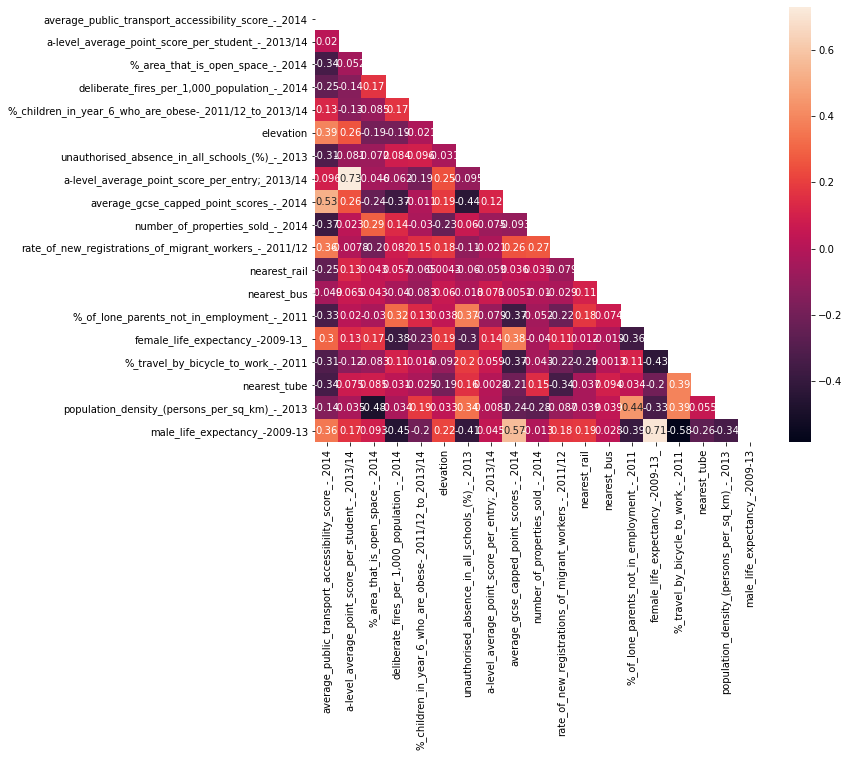

In [23]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [24]:
#drop columns with value > 0.7
num=num.drop(['a-level_average_point_score_per_student_-_2013/14', 'male_life_expectancy_-2009-13' ], axis=1)

*Check Variance of remaining columns*

In [25]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.9))
temp = sel.fit_transform(num)
temp = pd.DataFrame(temp)
print(num.shape)
print(temp.shape)

(791, 17)
(791, 15)


In [26]:
#only keep the 15 columns that are not dropped due to too little variance
num = num[num.columns[sel.get_support()]]

*Check correlation of remaining columns with target*

In [28]:
num_y=pd.concat([num, y], axis=1)

In [29]:
num_y[num_y.columns[1:]].corr()['total_usage'][:]

%_area_that_is_open_space_-_2014                          0.068165
%_children_in_year_6_who_are_obese-_2011/12_to_2013/14    0.039881
elevation                                                -0.021881
a-level_average_point_score_per_entry;_2013/14           -0.026726
average_gcse_capped_point_scores_-_2014                   0.087299
number_of_properties_sold_-_2014                          0.013160
rate_of_new_registrations_of_migrant_workers_-_2011/12    0.038139
nearest_rail                                             -0.061038
nearest_bus                                              -0.030939
%_of_lone_parents_not_in_employment_-_2011               -0.051022
female_life_expectancy_-2009-13_                          0.052253
%_travel_by_bicycle_to_work_-_2011                       -0.061142
nearest_tube                                             -0.041737
population_density_(persons_per_sq_km)_-_2013            -0.127555
total_usage                                               1.00

# Exploration on Categoricals

In [30]:
cat = data[data.select_dtypes(np.object).columns]
cat.shape

(791, 10)

In [31]:
cat.columns

Index(['description_code_x', 'oa11', 'laua', 'ward', 'lsoa11', 'msoa11',
       'oac11', 'ward_name', 'old_code', 'newcode'],
      dtype='object')

*I will only keep "description_code_x" - all the others are geographical features*

In [32]:
cat=cat[["description_code_x"]]

In [33]:
cat["description_code_x"].value_counts()

R      209
NR     142
M      138
PR     128
U       95
LU      63
PNR     16
Name: description_code_x, dtype: int64

In [34]:
cat["description_code_x"]=cat["description_code_x"].apply(lambda x : "NR" if x== "PNR" else x)
cat["description_code_x"]=cat["description_code_x"].apply(lambda x : "U" if x== "LU" else x)

In [35]:
cat["description_code_x"].value_counts()

R     209
NR    158
U     158
M     138
PR    128
Name: description_code_x, dtype: int64

# Removing Outliers

In [36]:
data = pd.concat([num, cat], axis=1)
data.shape

(791, 16)

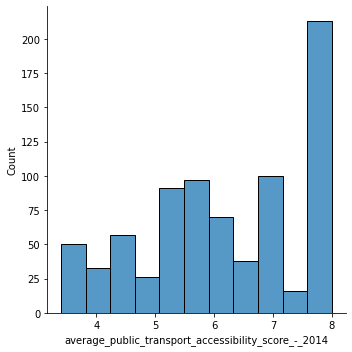

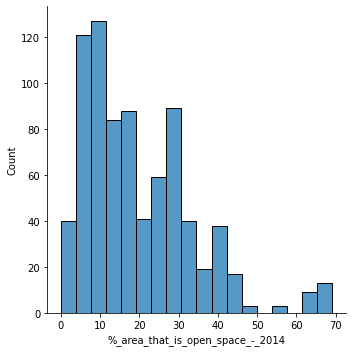

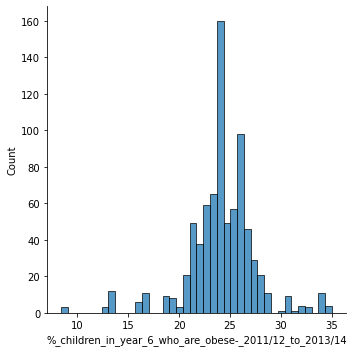

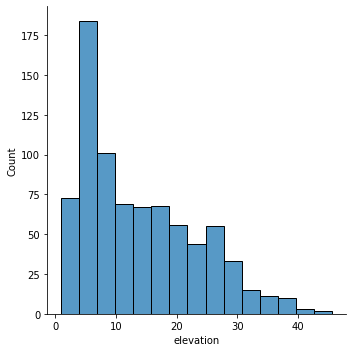

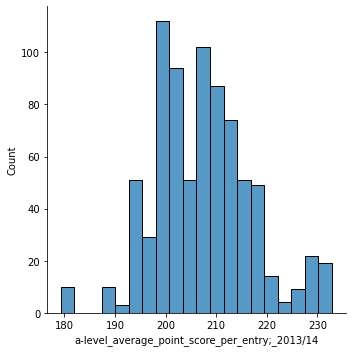

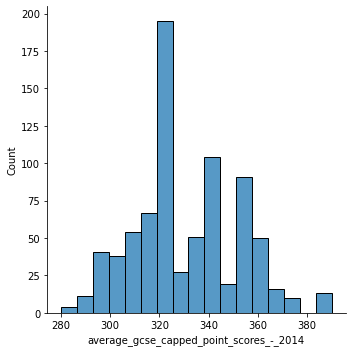

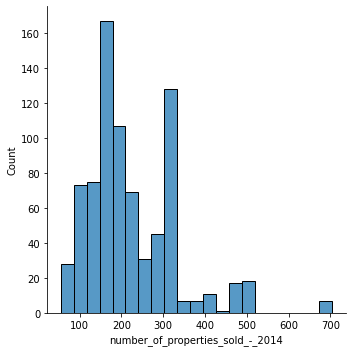

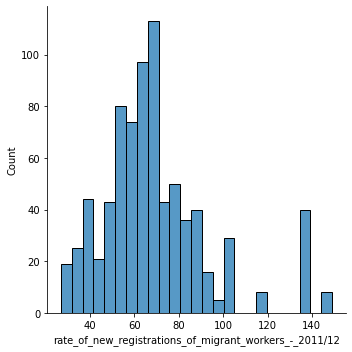

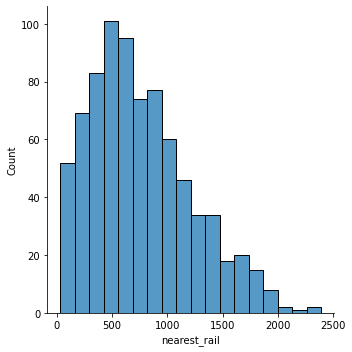

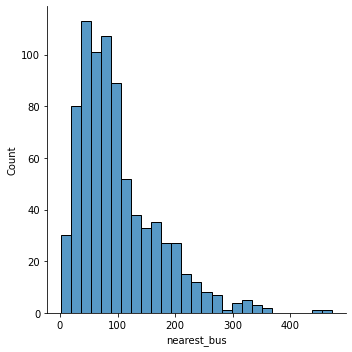

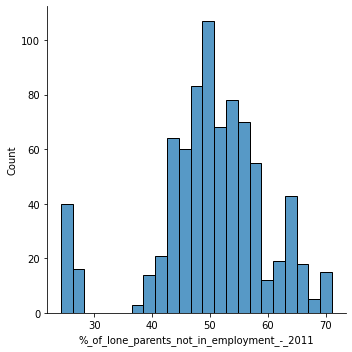

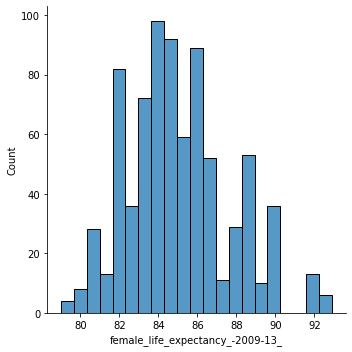

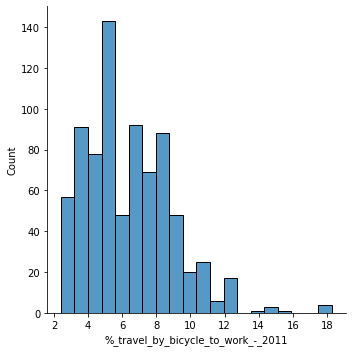

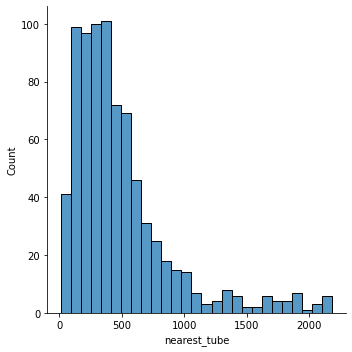

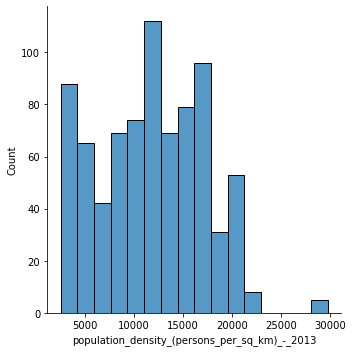

In [37]:
for i in data.drop(["description_code_x"], axis=1):
    sns.displot(data[i])
    plt.show()

# Transformations and encoding

*Numericals - applying transformations, tested log, BoxCox and Square Root*

In [38]:
def log_transform_clean(x):
    if x>0:
        return np.log(x)
    else:
        return 0  

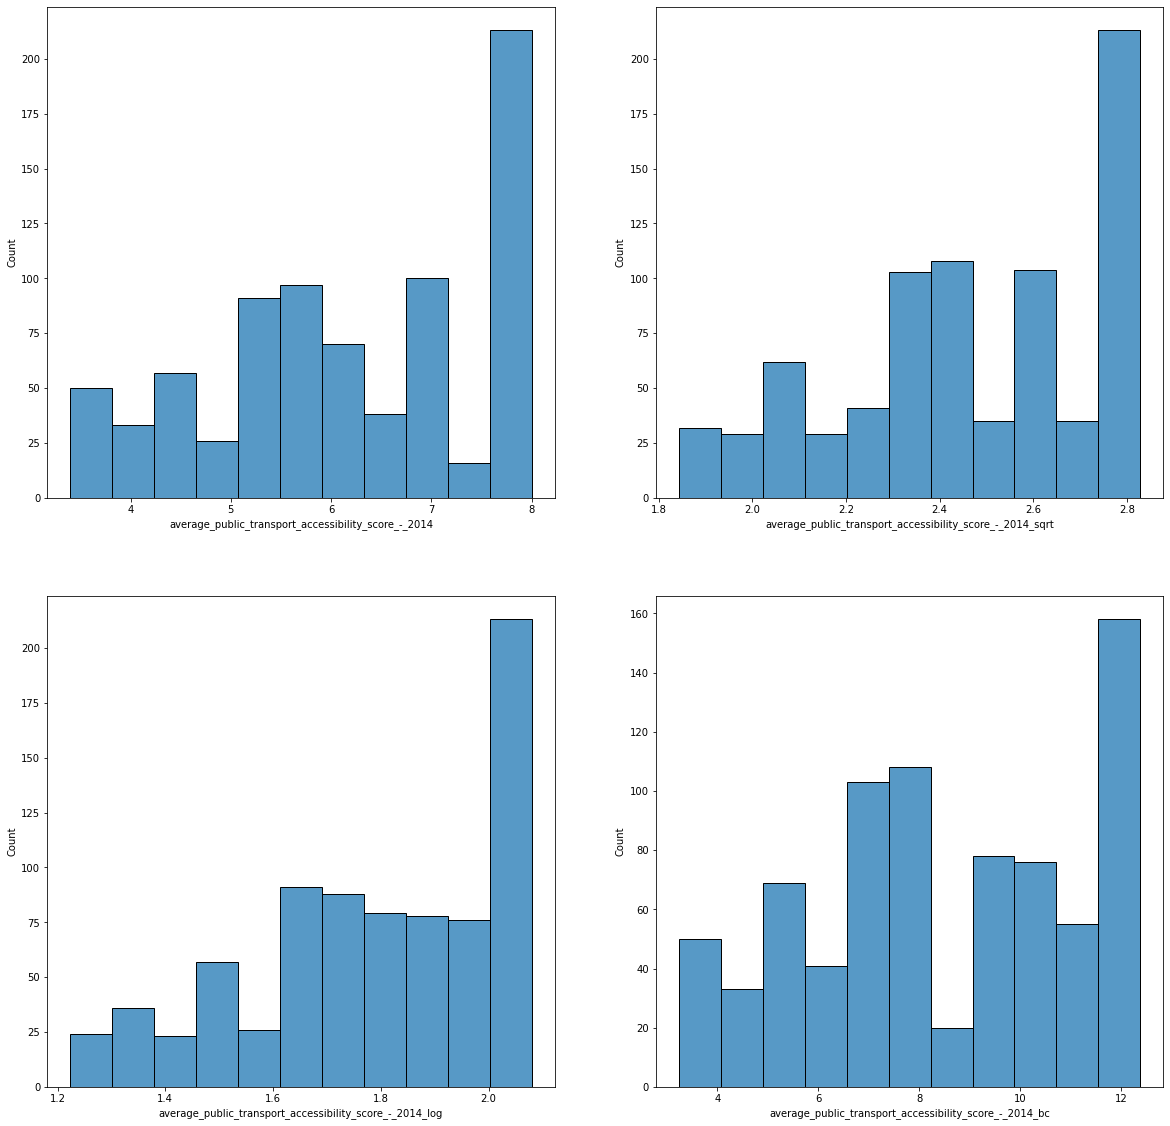

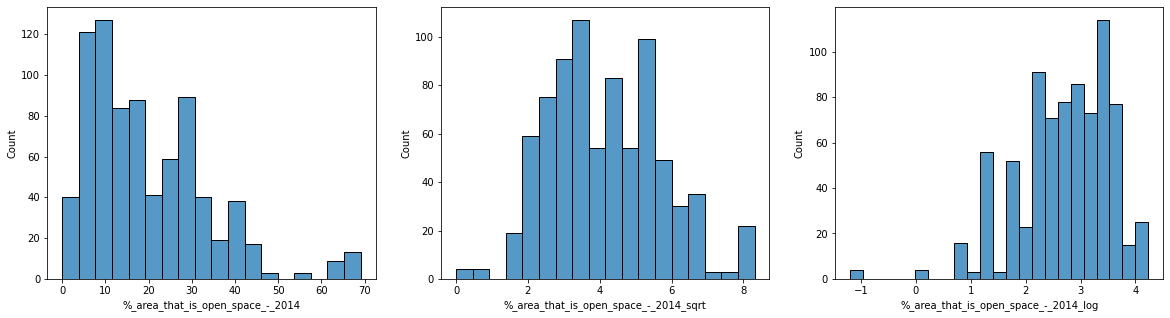

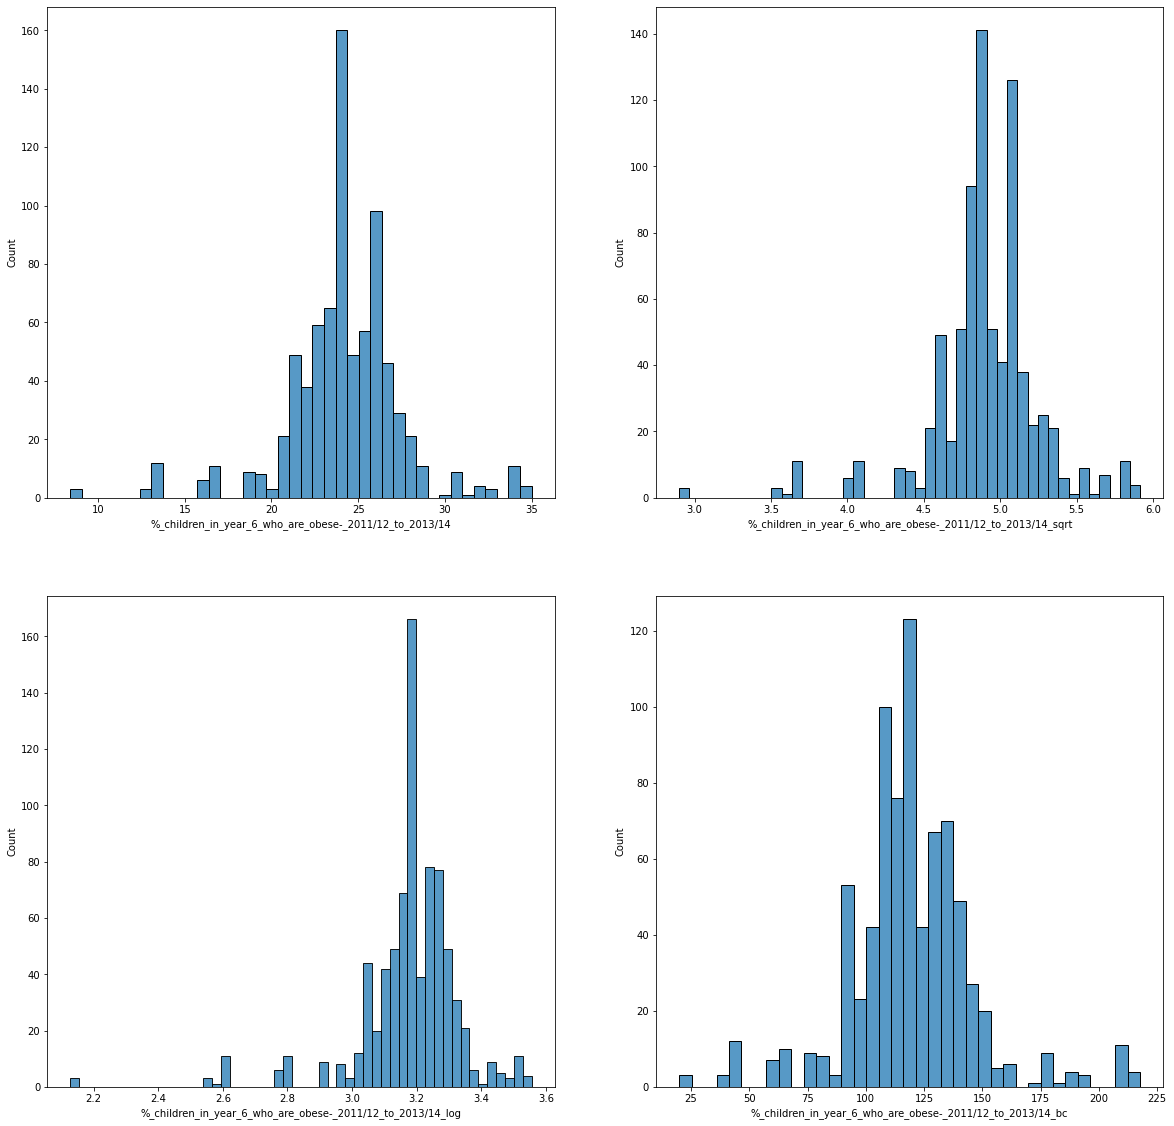

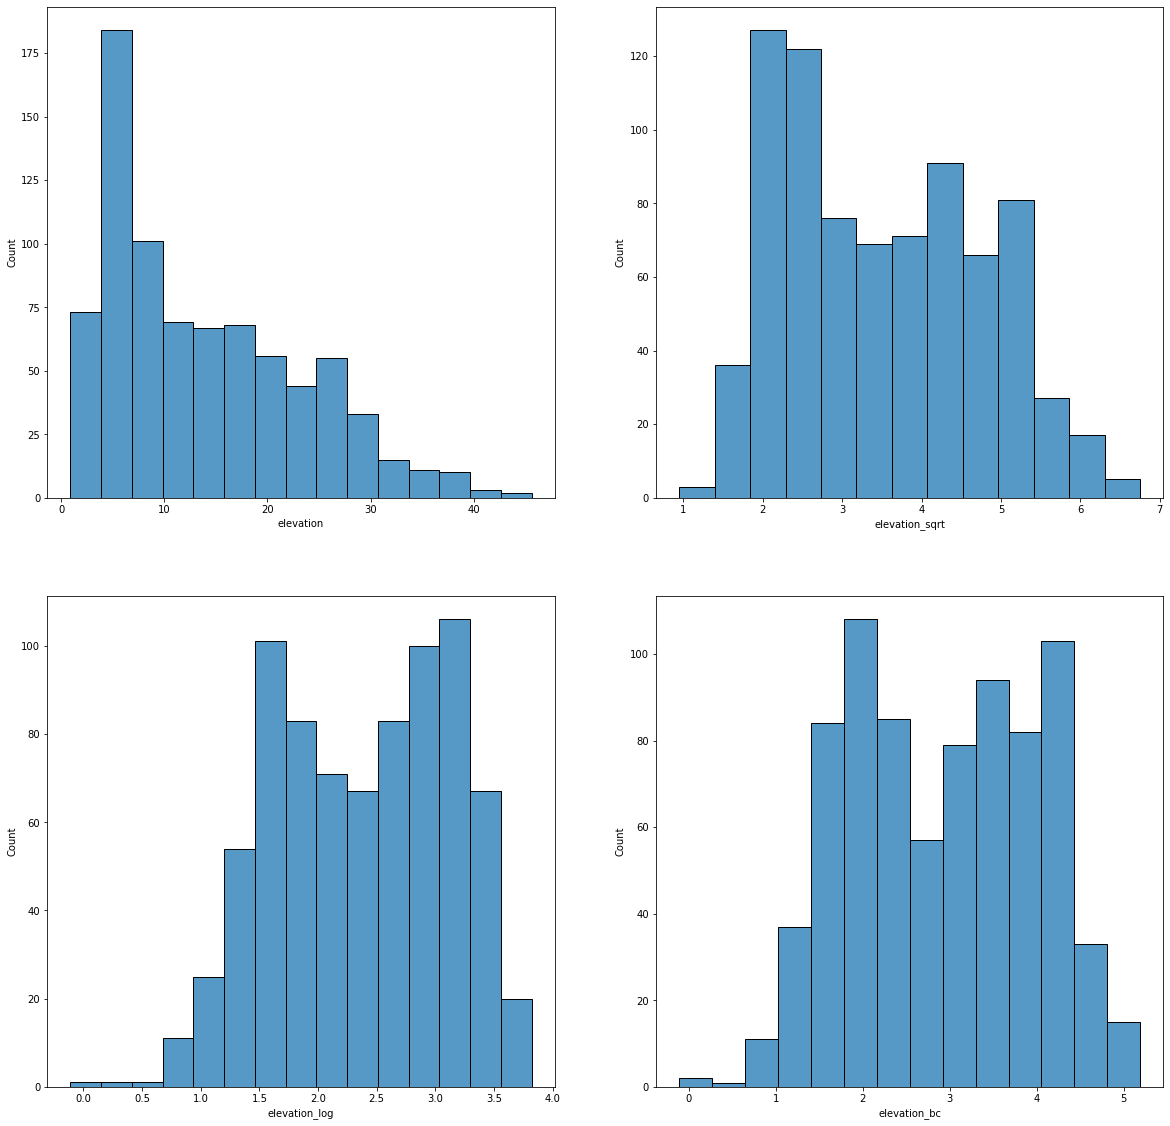

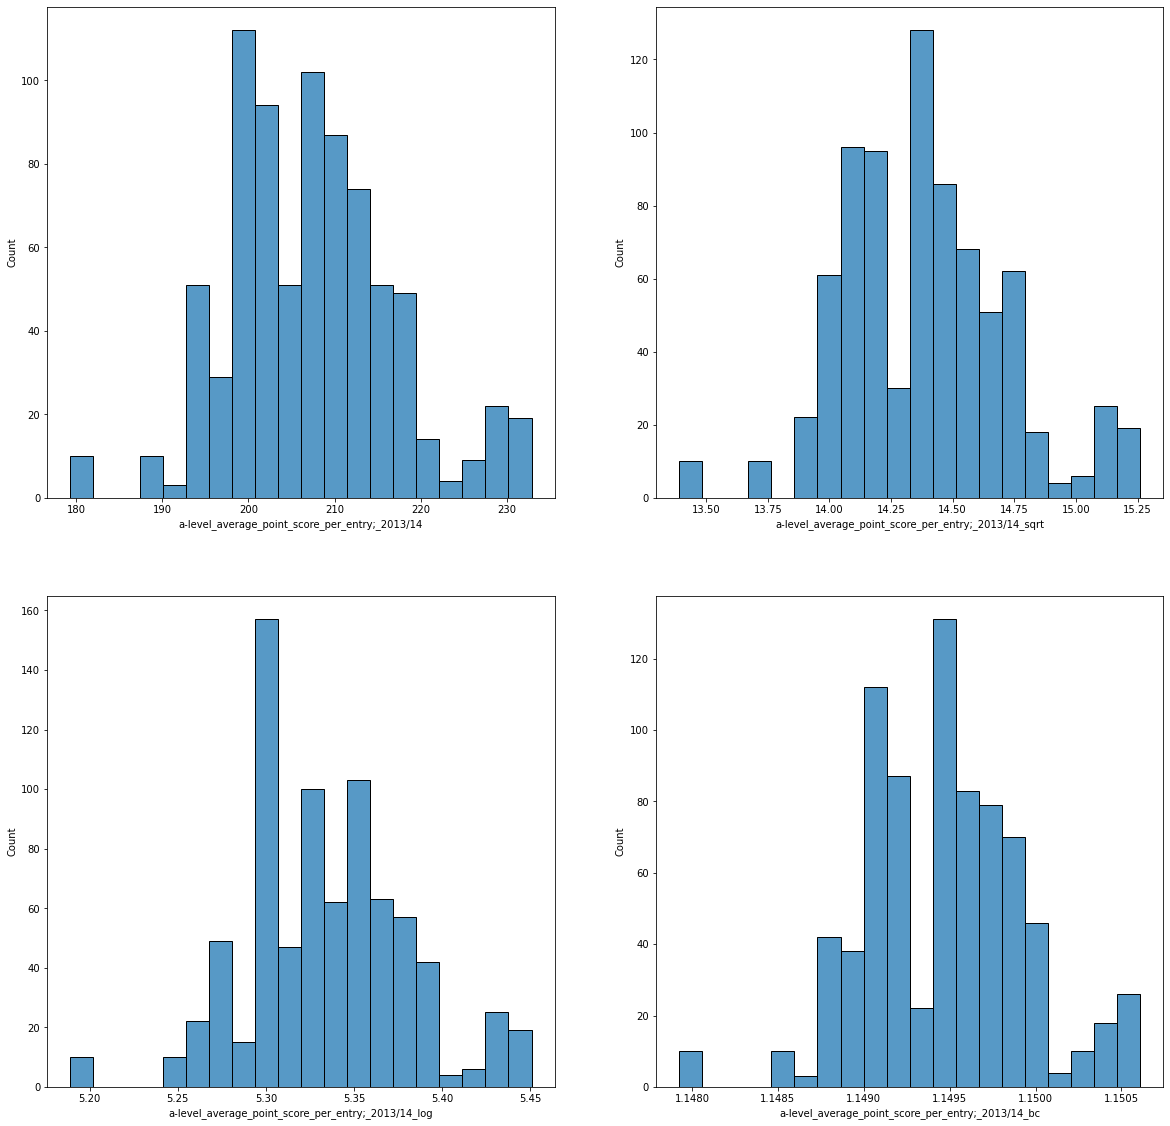

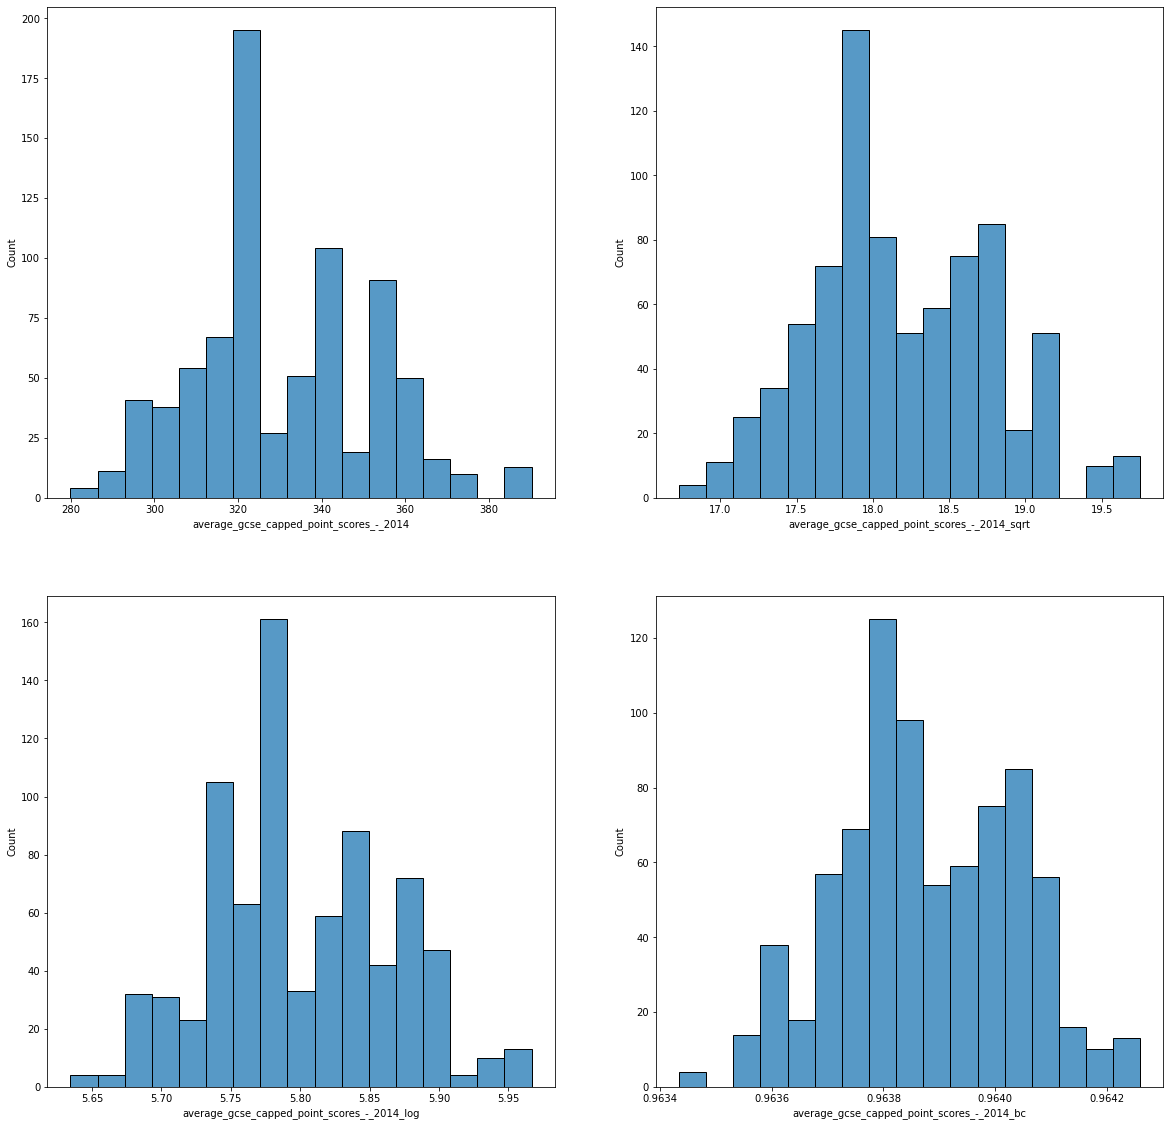

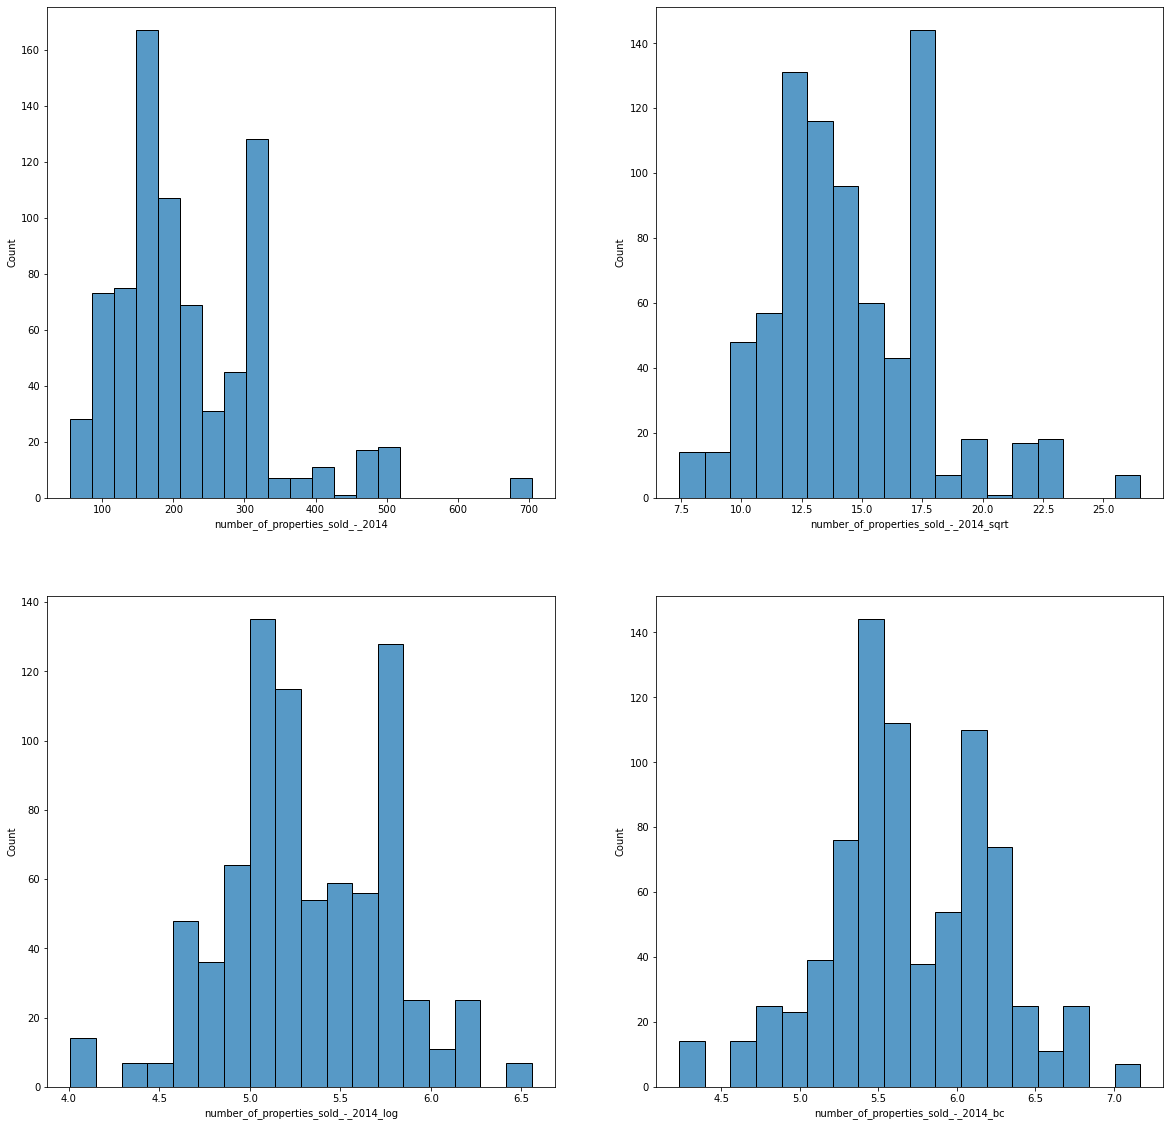

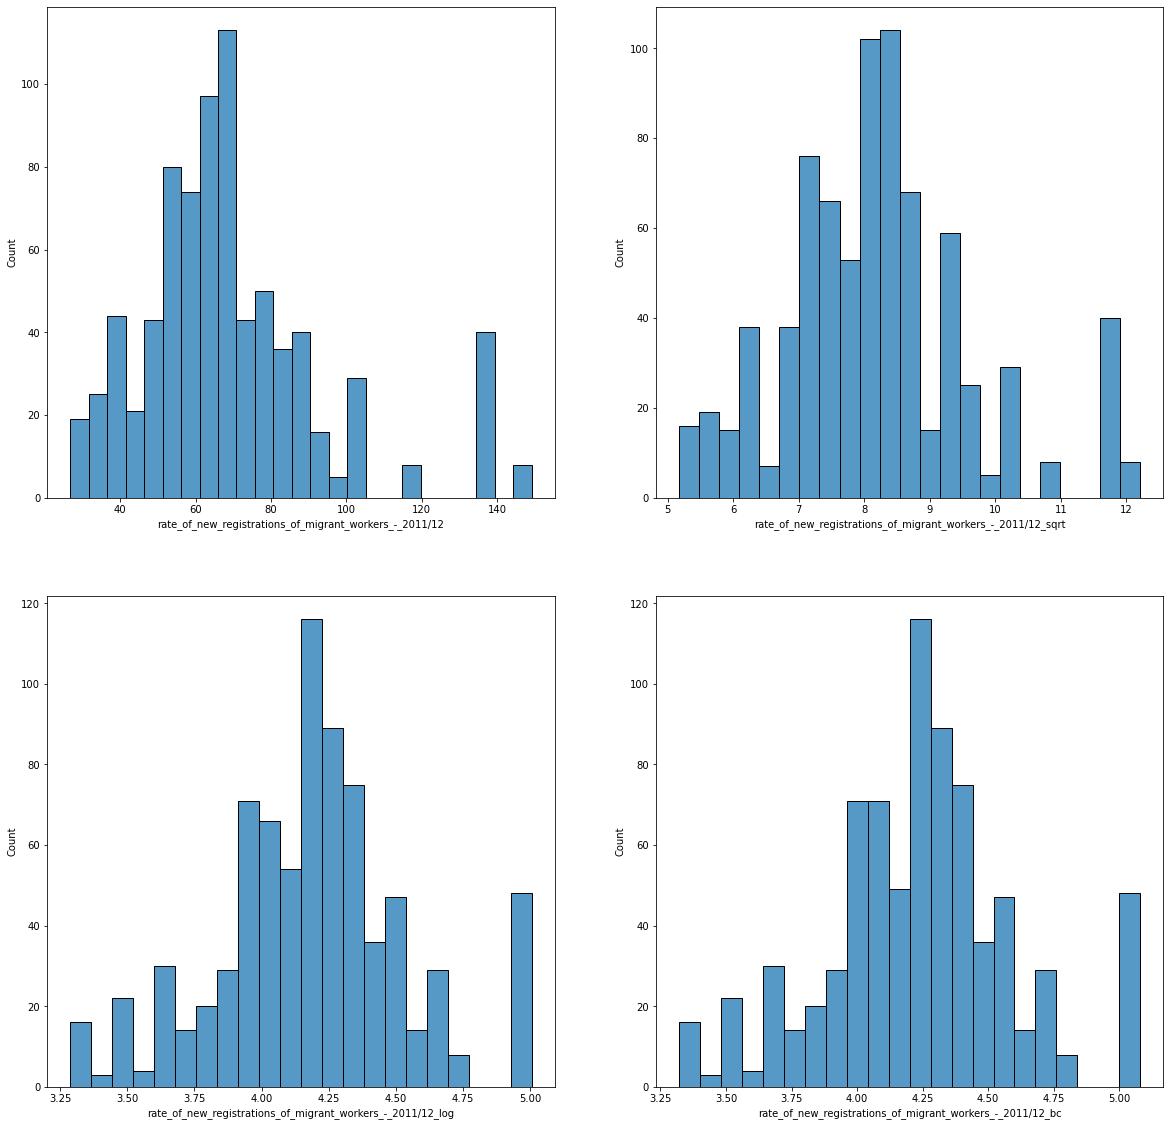

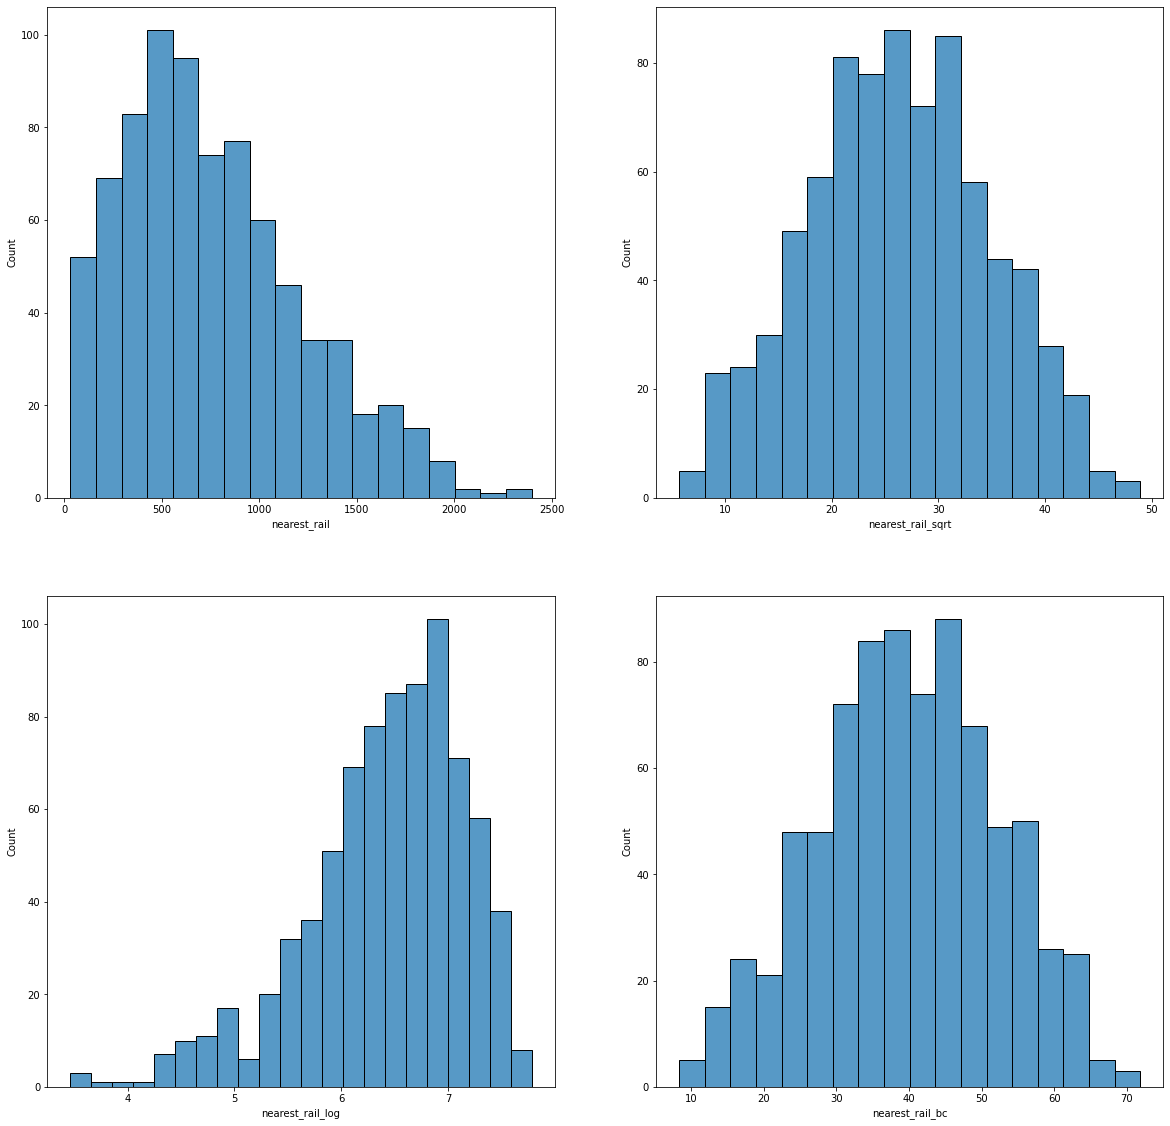

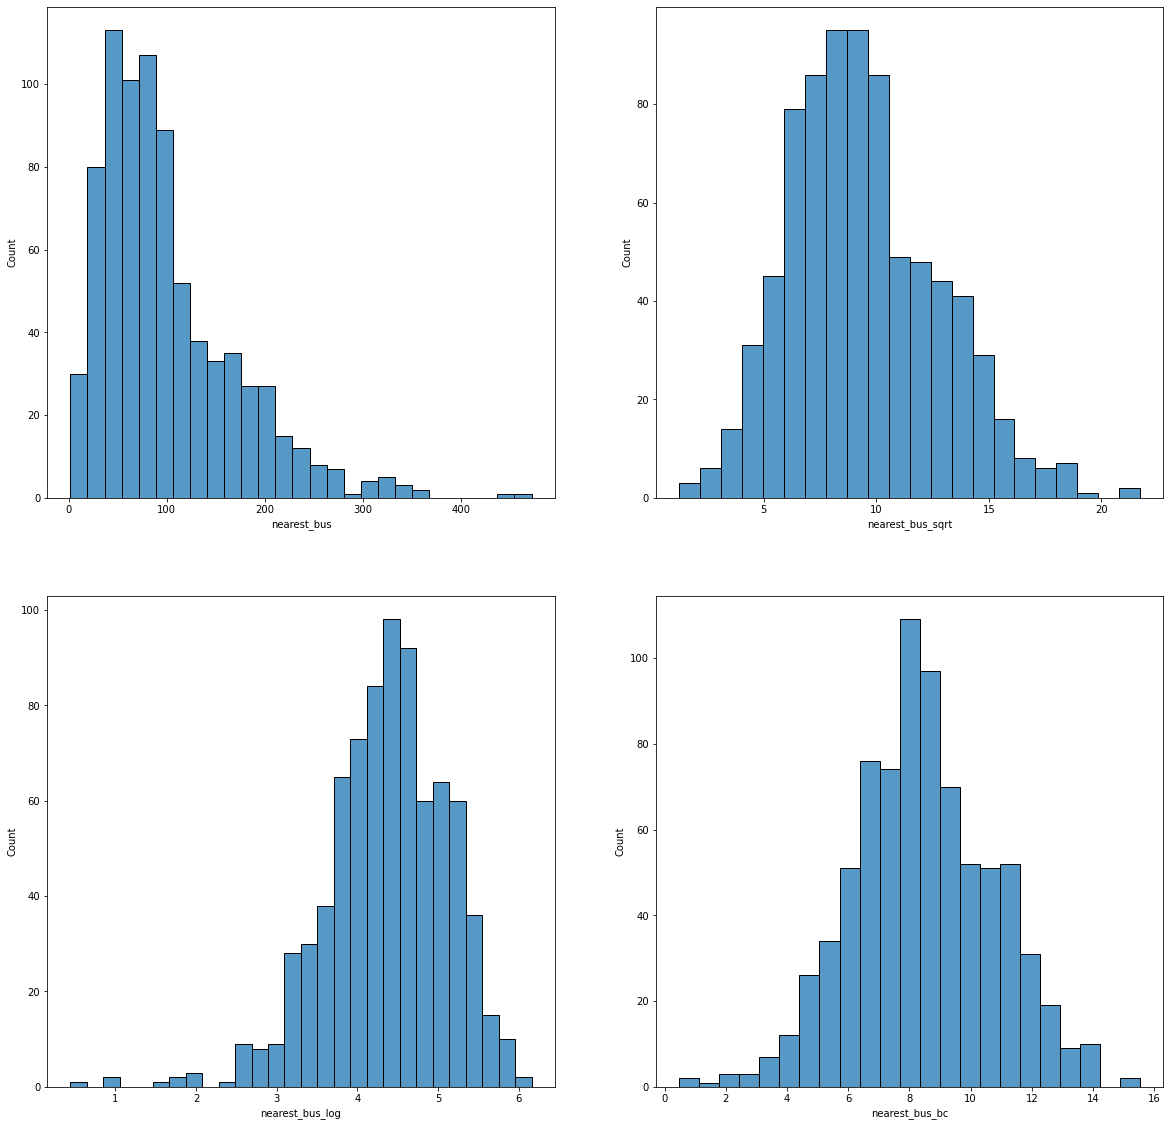

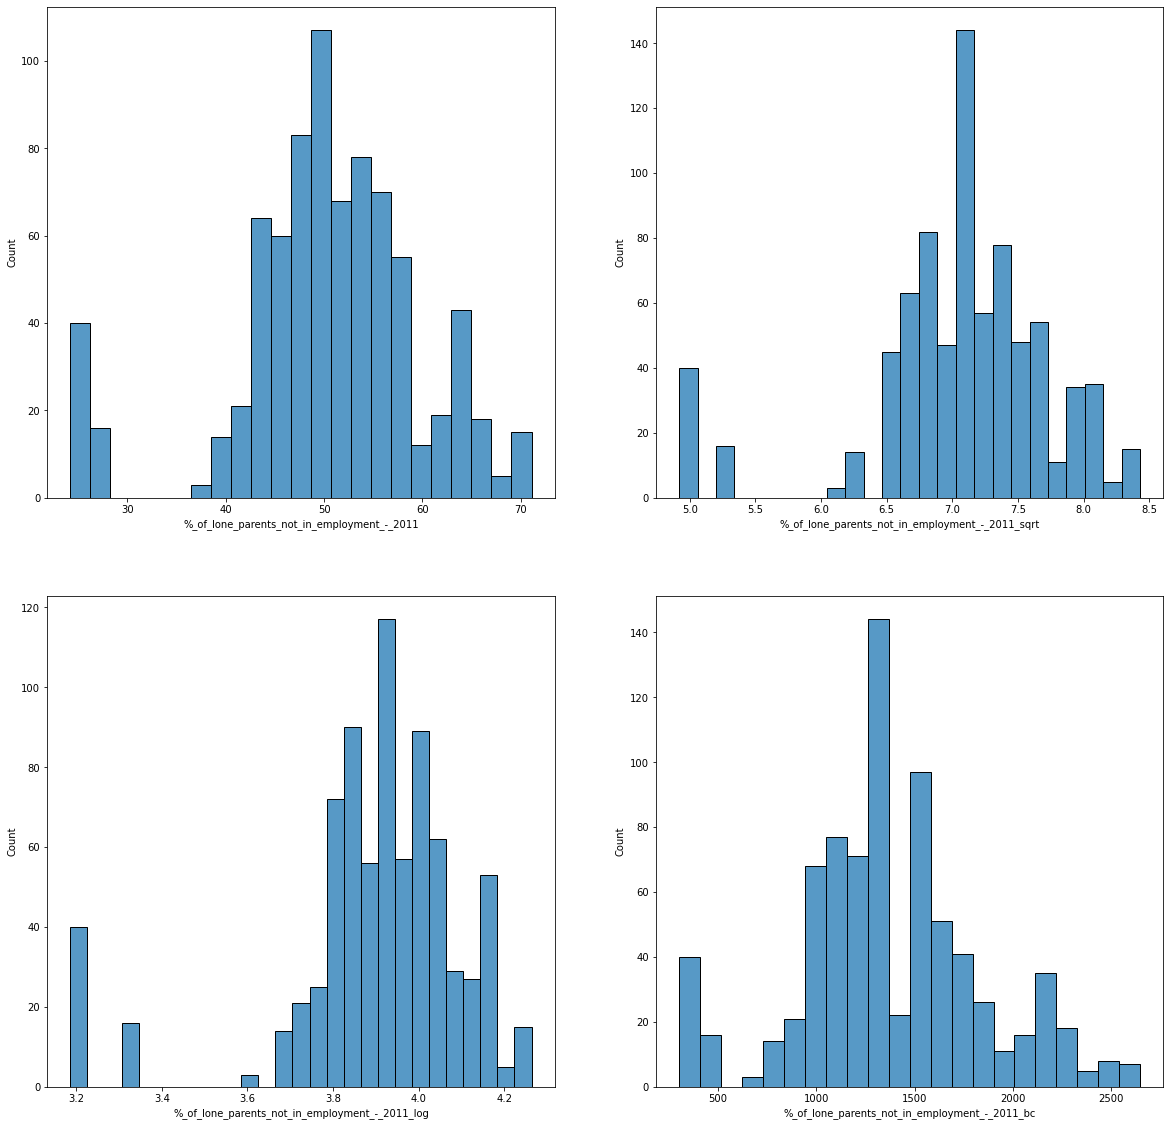

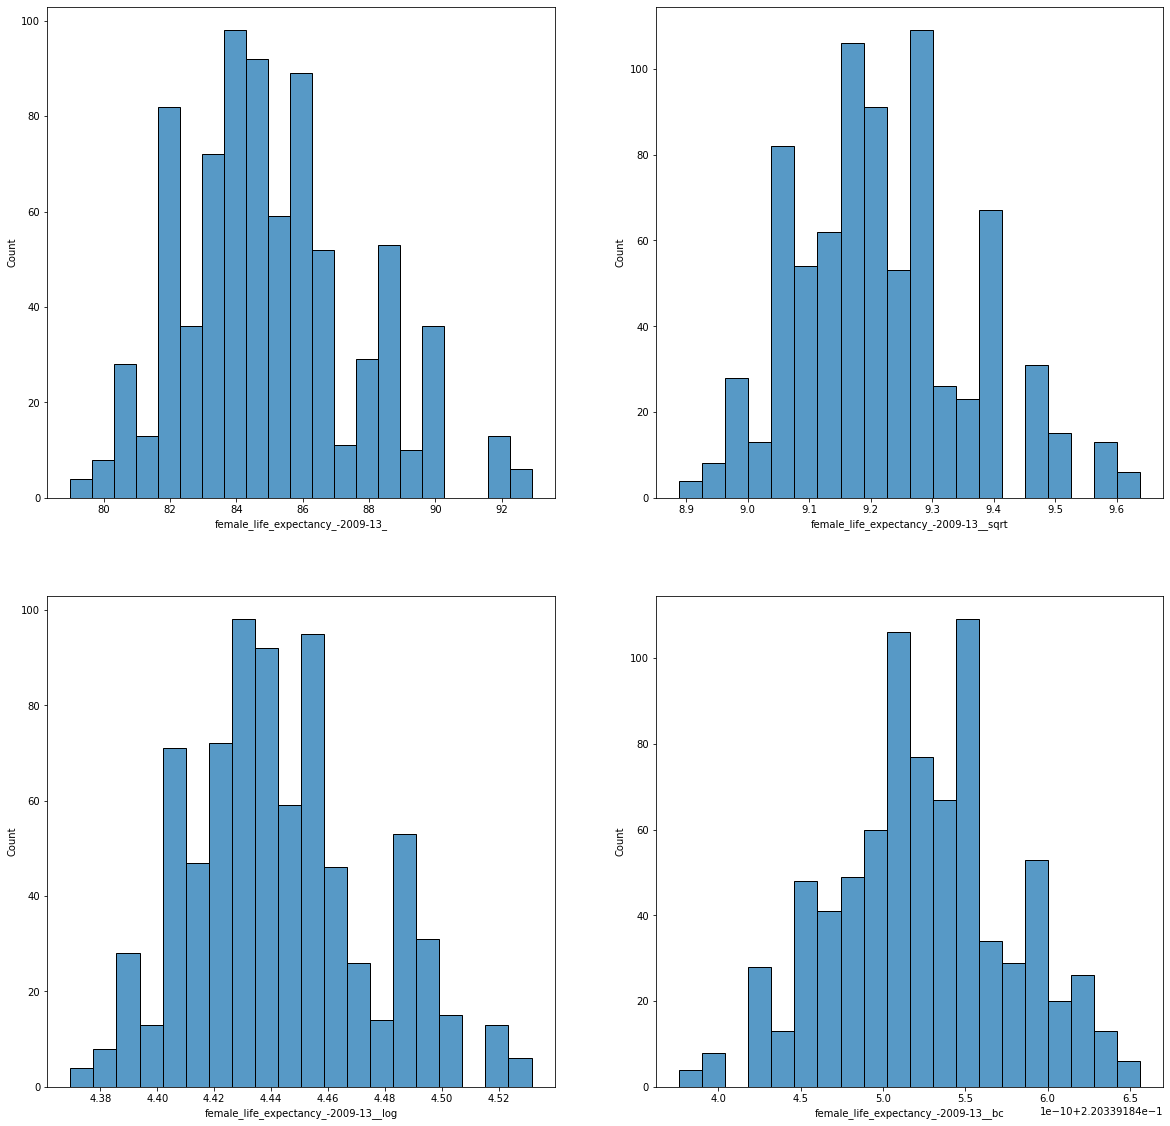

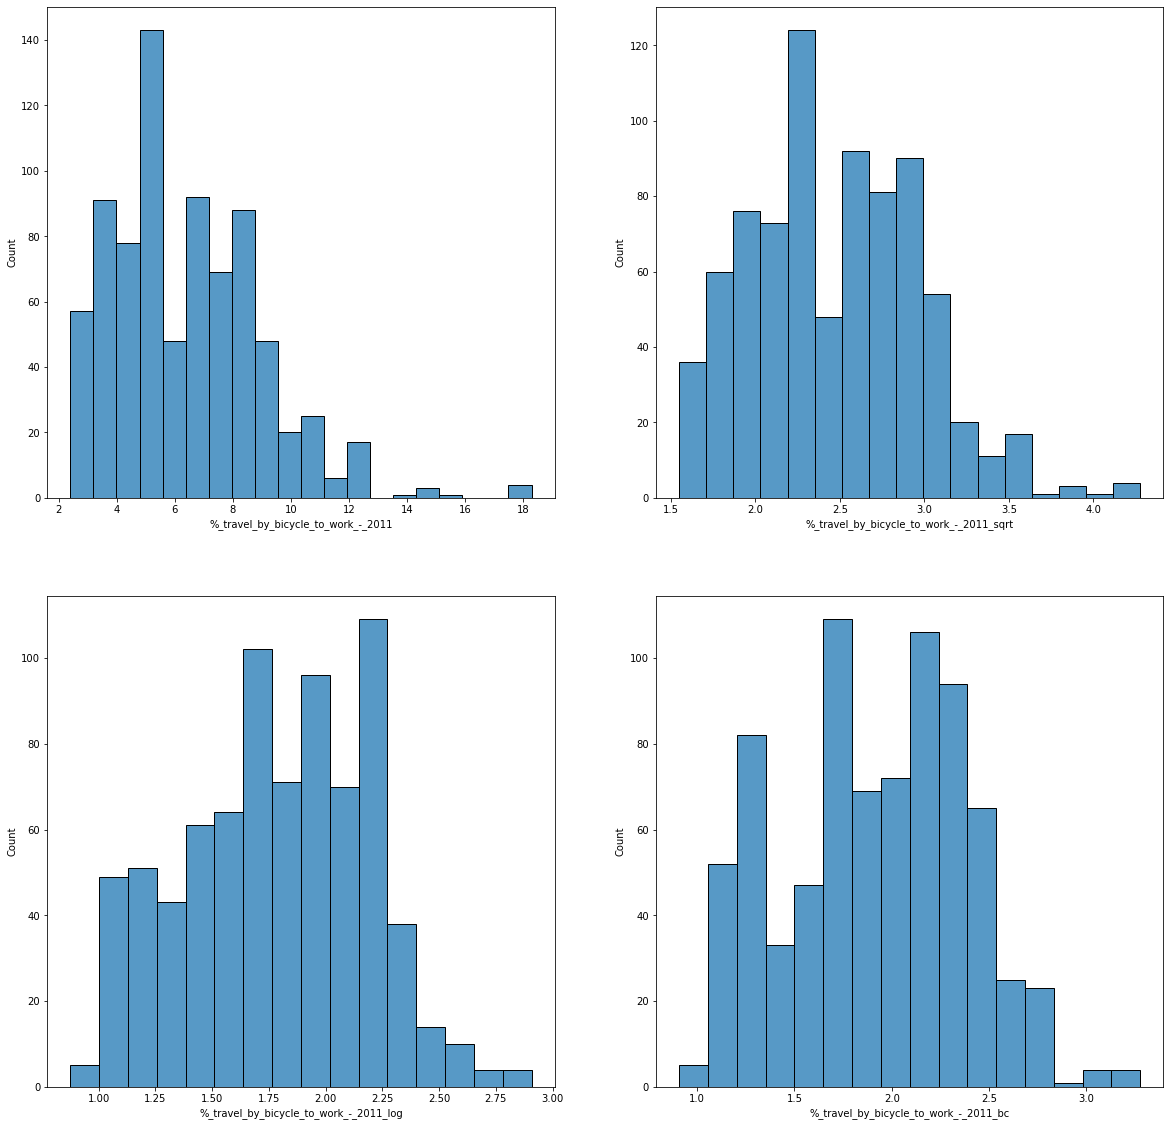

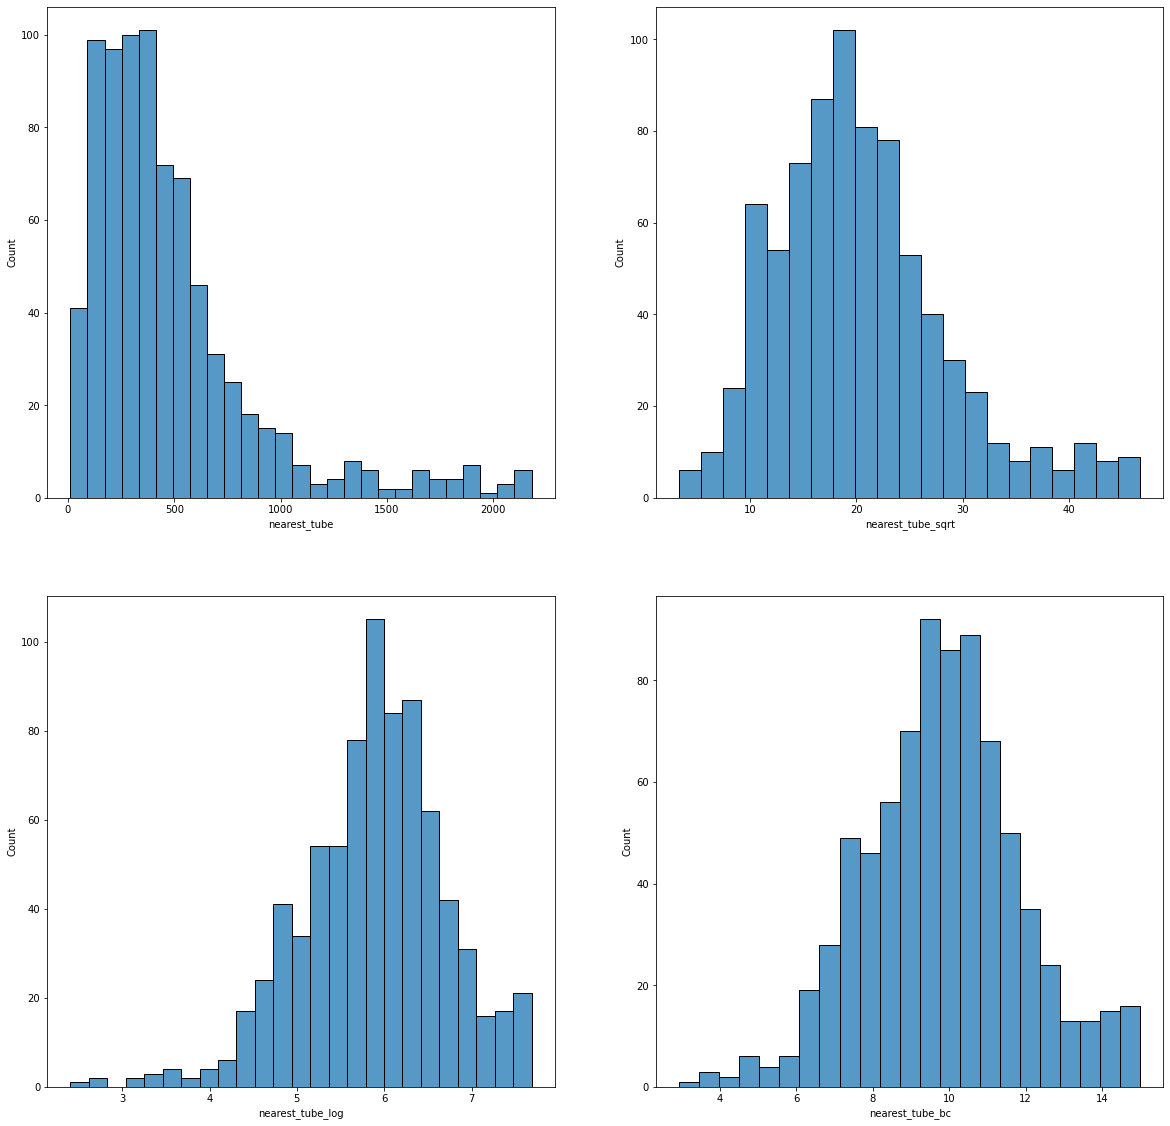

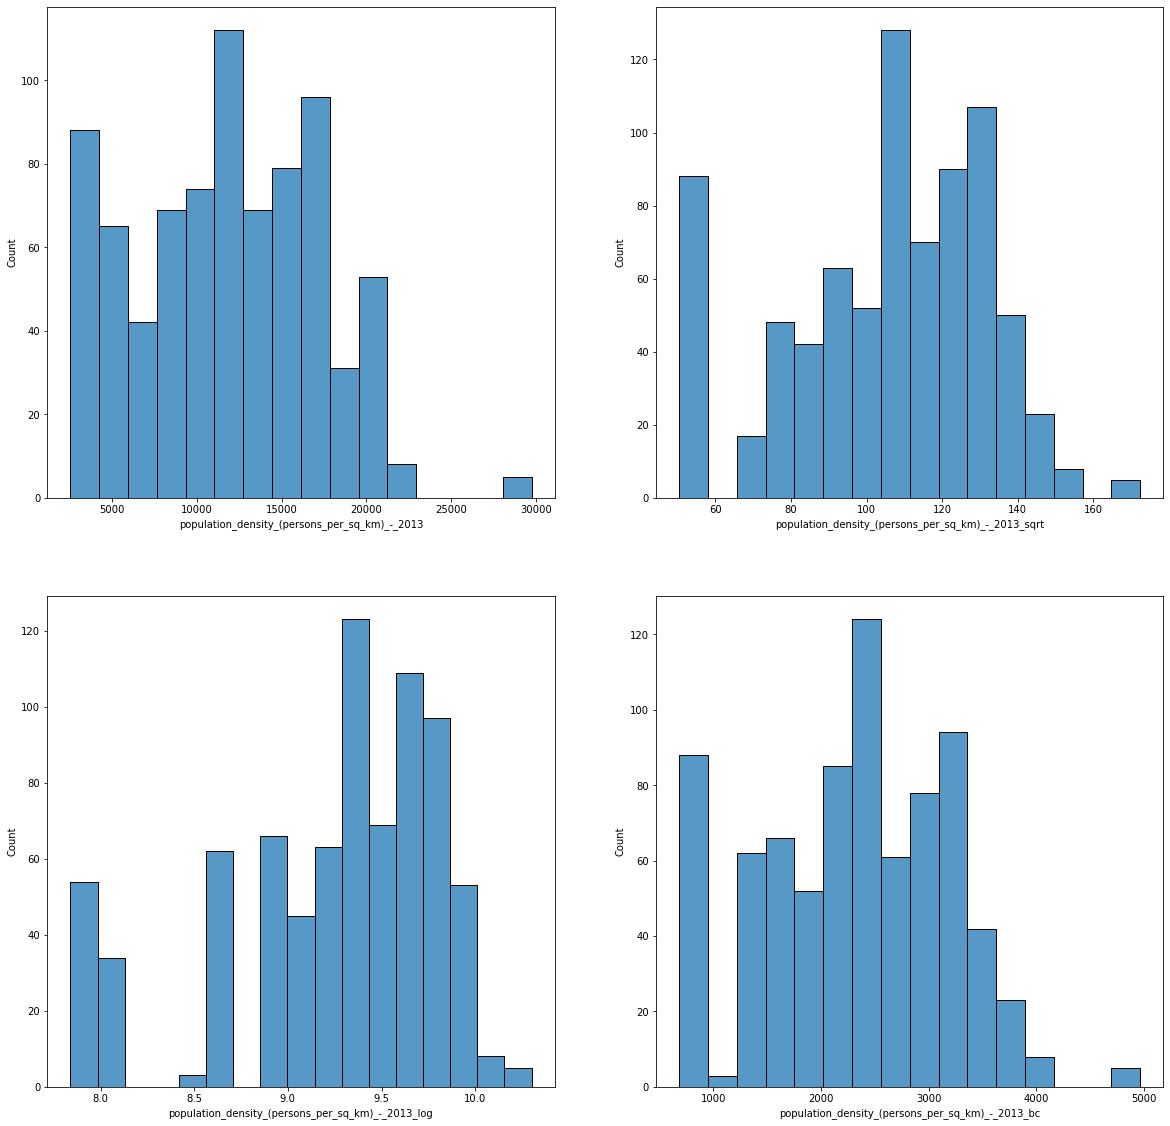

In [39]:
from scipy import stats

for name in data.columns:
    if name != "description_code_x":
        if data[name].min() > 0:

            data[name+"_sqrt"] = data[name]**(1/2)
            data[name+"_log"] = list(map(log_transform_clean, data[name]))
            box_cox, lmbda = stats.boxcox(data[name])
            data[name+"_bc"]= box_cox

            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
            plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
            sns.histplot(data[name], ax=ax1)
            sns.histplot(data[name+"_sqrt"], ax=ax2)
            sns.histplot(data[name+"_log"], ax=ax3)
            sns.histplot(data[name+"_bc"], ax=ax4)
        else:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
            data[name+"_sqrt"] = data[name]**(1/2)
            data[name+"_log"] = list(map(log_transform_clean, data[name]))
            sns.histplot(data[name], ax=ax1)
            sns.histplot(data[name+"_sqrt"], ax=ax2)
            sns.histplot(data[name+"_log"], ax=ax3)
    else: continue
        
           

In [40]:
#choosing the transformations I will use
data =data[["description_code_x",'number_of_properties_sold_-_2014_bc', 'elevation_bc', 'average_gcse_capped_point_scores_-_2014_bc',
       'rate_of_new_registrations_of_migrant_workers_-_2011/12_log',  'average_public_transport_accessibility_score_-_2014_bc',
        'nearest_tube_bc', 'nearest_bus_bc', 'female_life_expectancy_-2009-13__bc',
        '%_of_lone_parents_not_in_employment_-_2011', '%_travel_by_bicycle_to_work_-_2011_log',
        'a-level_average_point_score_per_entry;_2013/14', 'nearest_rail_bc', '%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc',
        'population_density_(persons_per_sq_km)_-_2013_sqrt',
        '%_area_that_is_open_space_-_2014_sqrt']]

*Apply scaling to numerical values*

In [41]:
cat = data[data.select_dtypes(np.object).columns]
num = data[data.select_dtypes(np.number).columns]

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

transformer = StandardScaler().fit(num)
num_standardized = transformer.transform(num)

transformer2=Normalizer().fit(num)
num_normalized = transformer.transform(num)

In [44]:
num_standardized = pd.DataFrame(num_standardized, index=num.index)
num_standardized.columns = num.columns
num_standardized.head()

,number_of_properties_sold_-_2014_bc,elevation_bc,average_gcse_capped_point_scores_-_2014_bc,rate_of_new_registrations_of_migrant_workers_-_2011/12_log,average_public_transport_accessibility_score_-_2014_bc,nearest_tube_bc,nearest_bus_bc,female_life_expectancy_-2009-13__bc,%_of_lone_parents_not_in_employment_-_2011,%_travel_by_bicycle_to_work_-_2011_log,a-level_average_point_score_per_entry;_2013/14,nearest_rail_bc,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc,population_density_(persons_per_sq_km)_-_2013_sqrt,%_area_that_is_open_space_-_2014_sqrt
0,1.742087,-0.752667,0.393112,-2.359200,-1.733613,1.640840,0.742698,0.413437,-0.677060,0.521532,1.187194,0.480993,-2.107899,-0.026669,0.068952
1,0.969421,0.733202,0.469189,-2.492227,-0.536896,0.845862,0.380182,-1.329357,-0.833317,0.655140,1.176933,0.835405,-0.906846,-0.202528,-0.520915
2,0.969421,0.459979,0.469189,-2.492227,-0.536896,0.996070,-1.580687,-1.329357,-0.833317,0.655140,1.176933,0.520273,-0.906846,-0.202528,-0.520915
3,0.969421,-0.800113,0.469189,-2.492227,-0.536896,1.743731,-0.643854,-1.329357,-0.833317,0.655140,1.176933,-0.384647,-0.906846,-0.202528,-0.520915
4,0.969421,1.018731,0.469189,-2.492227,-0.536896,2.282494,0.860811,-1.329357,-0.833317,0.655140,1.176933,0.329307,-0.906846,-0.202528,-0.520915


In [45]:
num_normalized = pd.DataFrame(num_normalized, index=num.index)
num_normalized.columns = num.columns
num_normalized.head()

,number_of_properties_sold_-_2014_bc,elevation_bc,average_gcse_capped_point_scores_-_2014_bc,rate_of_new_registrations_of_migrant_workers_-_2011/12_log,average_public_transport_accessibility_score_-_2014_bc,nearest_tube_bc,nearest_bus_bc,female_life_expectancy_-2009-13__bc,%_of_lone_parents_not_in_employment_-_2011,%_travel_by_bicycle_to_work_-_2011_log,a-level_average_point_score_per_entry;_2013/14,nearest_rail_bc,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc,population_density_(persons_per_sq_km)_-_2013_sqrt,%_area_that_is_open_space_-_2014_sqrt
0,1.742087,-0.752667,0.393112,-2.359200,-1.733613,1.640840,0.742698,0.413437,-0.677060,0.521532,1.187194,0.480993,-2.107899,-0.026669,0.068952
1,0.969421,0.733202,0.469189,-2.492227,-0.536896,0.845862,0.380182,-1.329357,-0.833317,0.655140,1.176933,0.835405,-0.906846,-0.202528,-0.520915
2,0.969421,0.459979,0.469189,-2.492227,-0.536896,0.996070,-1.580687,-1.329357,-0.833317,0.655140,1.176933,0.520273,-0.906846,-0.202528,-0.520915
3,0.969421,-0.800113,0.469189,-2.492227,-0.536896,1.743731,-0.643854,-1.329357,-0.833317,0.655140,1.176933,-0.384647,-0.906846,-0.202528,-0.520915
4,0.969421,1.018731,0.469189,-2.492227,-0.536896,2.282494,0.860811,-1.329357,-0.833317,0.655140,1.176933,0.329307,-0.906846,-0.202528,-0.520915


In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_cols= cat.columns
one_hot_data=pd.get_dummies(cat[cat_cols], drop_first=True)
cat=pd.concat([cat, one_hot_data], axis=1)   # concat dataframes
cat.drop(columns=cat_cols, inplace=True)
cat.head()

,description_code_x_NR,description_code_x_PR,description_code_x_R,description_code_x_U
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [47]:
X = pd.concat([num_normalized, cat], axis=1)
X.head()

,number_of_properties_sold_-_2014_bc,elevation_bc,average_gcse_capped_point_scores_-_2014_bc,rate_of_new_registrations_of_migrant_workers_-_2011/12_log,average_public_transport_accessibility_score_-_2014_bc,nearest_tube_bc,nearest_bus_bc,female_life_expectancy_-2009-13__bc,%_of_lone_parents_not_in_employment_-_2011,%_travel_by_bicycle_to_work_-_2011_log,a-level_average_point_score_per_entry;_2013/14,nearest_rail_bc,%_children_in_year_6_who_are_obese-_2011/12_to_2013/14_bc,population_density_(persons_per_sq_km)_-_2013_sqrt,%_area_that_is_open_space_-_2014_sqrt,description_code_x_NR,description_code_x_PR,description_code_x_R,description_code_x_U
0,1.742087,-0.752667,0.393112,-2.359200,-1.733613,1.640840,0.742698,0.413437,-0.677060,0.521532,1.187194,0.480993,-2.107899,-0.026669,0.068952,0,0,0,1
1,0.969421,0.733202,0.469189,-2.492227,-0.536896,0.845862,0.380182,-1.329357,-0.833317,0.655140,1.176933,0.835405,-0.906846,-0.202528,-0.520915,0,0,1,0
2,0.969421,0.459979,0.469189,-2.492227,-0.536896,0.996070,-1.580687,-1.329357,-0.833317,0.655140,1.176933,0.520273,-0.906846,-0.202528,-0.520915,0,0,1,0
3,0.969421,-0.800113,0.469189,-2.492227,-0.536896,1.743731,-0.643854,-1.329357,-0.833317,0.655140,1.176933,-0.384647,-0.906846,-0.202528,-0.520915,0,0,0,0
4,0.969421,1.018731,0.469189,-2.492227,-0.536896,2.282494,0.860811,-1.329357,-0.833317,0.655140,1.176933,0.329307,-0.906846,-0.202528,-0.520915,0,0,1,0


# Run Models

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=100)

In [96]:
lm=LinearRegression()    # model
lm.fit(X_train, y_train)   # model train
predictions=lm.predict(X_test)   # model prediction
r2 = r2_score(y_test, predictions)
print(r2)
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

-0.07137916964809543
16071.276753575095


In [100]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_usage   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.125
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           8.48e-06
Time:                        16:12:48   Log-Likelihood:                -8752.2
No. Observations:                 791   AIC:                         1.754e+04
Df Residuals:                     771   BIC:                         1.764e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Feature: 0, Score: 0.00000
Feature: 1, Score: 1491.54512
Feature: 2, Score: -952.19315
Feature: 3, Score: 336.69727
Feature: 4, Score: -978.14812
Feature: 5, Score: 3143.24282
Feature: 6, Score: -1010.61066
Feature: 7, Score: -660.94248
Feature: 8, Score: -121.02251
Feature: 9, Score: 1002.40480
Feature: 10, Score: 408.23353
Feature: 11, Score: -362.82913
Feature: 12, Score: -214.23494
Feature: 13, Score: 228.91939
Feature: 14, Score: -796.48106
Feature: 15, Score: 1189.43924
Feature: 16, Score: 3829.78466
Feature: 17, Score: -2179.56039
Feature: 18, Score: -1499.70617
Feature: 19, Score: -1562.79417


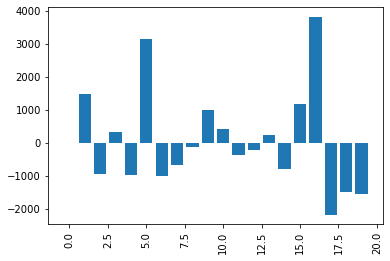

In [101]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(rotation='vertical')
pyplot.show()

In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)   # model prediction
r2 = r2_score(y_test, predictions)
print(r2)
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

-0.21795576701715125
17603.62981695161


In [52]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)
print("KNN:")
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(r2)
rmse = mean_squared_error(y_test, predictions)**0.5
print(rmse)

KNN:
-0.04865565336374855
16334.389995669022
